In [2]:
# Import require installed library using the given command. 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# %pip install seaborn
import seaborn as sns
plt.rcParams['figure.figsize'] = [25, 8]   # set inline plots, width and height in inches

df_aaup=pd.read_csv('http://lib.stat.cmu.edu/datasets/colleges/aaup.data', sep=',',names=['FICE','College Name','State(Postal code)','Type(I,IIA or IIB)','Average salary-full professors','Average salary-associate professors','Average salary-assistant professors','Average salary-all ranks','Average compensation-full professors','Average compensation-associate professors','Average compensation-assistant professors','Average compensation-all ranks','Number of full professors','Number of associate professors','Number of assistant professors','Number of instructors','Number of faculty-all ranks' ]).dropna()
df_usnews=pd.read_csv('http://lib.stat.cmu.edu/datasets/colleges/usnews.data',sep=',',names=['FICE (Federal ID number)','College Name','State(Postal code)','Public/private indicator (public=1, private=2)','Average Math SAT score','Average Verbal SAT score','Average Combined SAT score','Average ACT score','First quartile - Math SAT','Third quartile - Math SAT','First quartile - Verbal SAT','Third quartile - Verbal SAT','First quartile - ACT','Third quartile - ACT','Number of applications received','Number of applicants accepted','Number of new students enrolled','Pct. new students from top 10% of H.S. class','Pct. new students from top 25% of H.S. class','Number of fulltime undergraduates','Number of parttime undergraduatesIn-state tuition','In-state tuition','Out-of-state tuition','Room and board costs','Room costs','Board costs','Additional fees','Estimated book costs','Estimated personal spending',"Pct. of faculty with Ph.D.'s","Pct. of faculty with terminal degree","Student/faculty ratio","Pct.alumni who donate","Instructional expenditure per student",'Graduation rate']).dropna()
df_aaup=df_aaup.replace('*',0)
df_usnews=df_usnews.replace('*',0)
pd.set_option('display.max_columns',35)                 # TO DISPLAY ALL COLUMNS
plt.style.use('ggplot')

In [3]:
# Converting data to int and float data type from string data type.
for col in df_aaup.columns[4:]:
    df_aaup[col]=df_aaup[col].astype(int)
for col in df_usnews.columns[3:]:
    df_usnews[col]=df_usnews[col].astype(float)



## DATA OVERVIEW

In [4]:
print('Total no. of colleges in the dataset are ',df_aaup.iloc[:,1].drop_duplicates().shape[0])
print('Total no. of type(I) colleges are ',df_aaup.iloc[:,3].value_counts()['I'])
print('Total no. of type(IIB) colleges are ',df_aaup.iloc[:,3].value_counts()['IIB'])
print('Total no. of type(IIA) colleges are ',df_aaup.iloc[:,3].value_counts()['IIA'])


df_aaup

Total no. of colleges in the dataset are  1140
Total no. of type(I) colleges are  180
Total no. of type(IIB) colleges are  617
Total no. of type(IIA) colleges are  363


,FICE,College Name,State(Postal code),"Type(I,IIA or IIB)",Average salary-full professors,Average salary-associate professors,Average salary-assistant professors,Average salary-all ranks,Average compensation-full professors,Average compensation-associate professors,Average compensation-assistant professors,Average compensation-all ranks,Number of full professors,Number of associate professors,Number of assistant professors,Number of instructors,Number of faculty-all ranks
0,1061,Alaska Pacific University,AK,IIB,454,382,362,382,567,485,471,487,6,11,9,4,32
1,1063,Univ.Alaska-Fairbanks,AK,I,686,560,432,508,914,753,572,677,74,125,118,40,404
2,1065,Univ.Alaska-Southeast,AK,IIA,533,494,329,415,716,663,442,559,9,26,20,9,70
3,11462,Univ.Alaska-Anchorage,AK,IIA,612,507,414,498,825,681,557,670,115,124,101,21,392
4,1002,Alabama Agri.&Mech. Univ.,AL,IIA,442,369,310,350,530,444,376,423,59,77,102,24,262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1156,3825,West Virginia Inst. of Tech.,WV,IIB,408,340,297,349,502,419,369,431,54,43,29,11,137
1157,3827,West Virginia University,WV,I,535,431,361,439,642,521,438,529,335,237,272,22,895
1158,3830,West Virginia Wesleyan Coll.,WV,IIB,441,383,339,383,572,494,434,495,25,22,24,3,74
1159,3831,Wheeling Jesuit College,WV,IIB,403,348,282,315,486,416,348,381,8,20,25,12,65


### Q1) What is the probability that a randomly choosen college from the dataset lies in the most popular state in US for higher studies? 

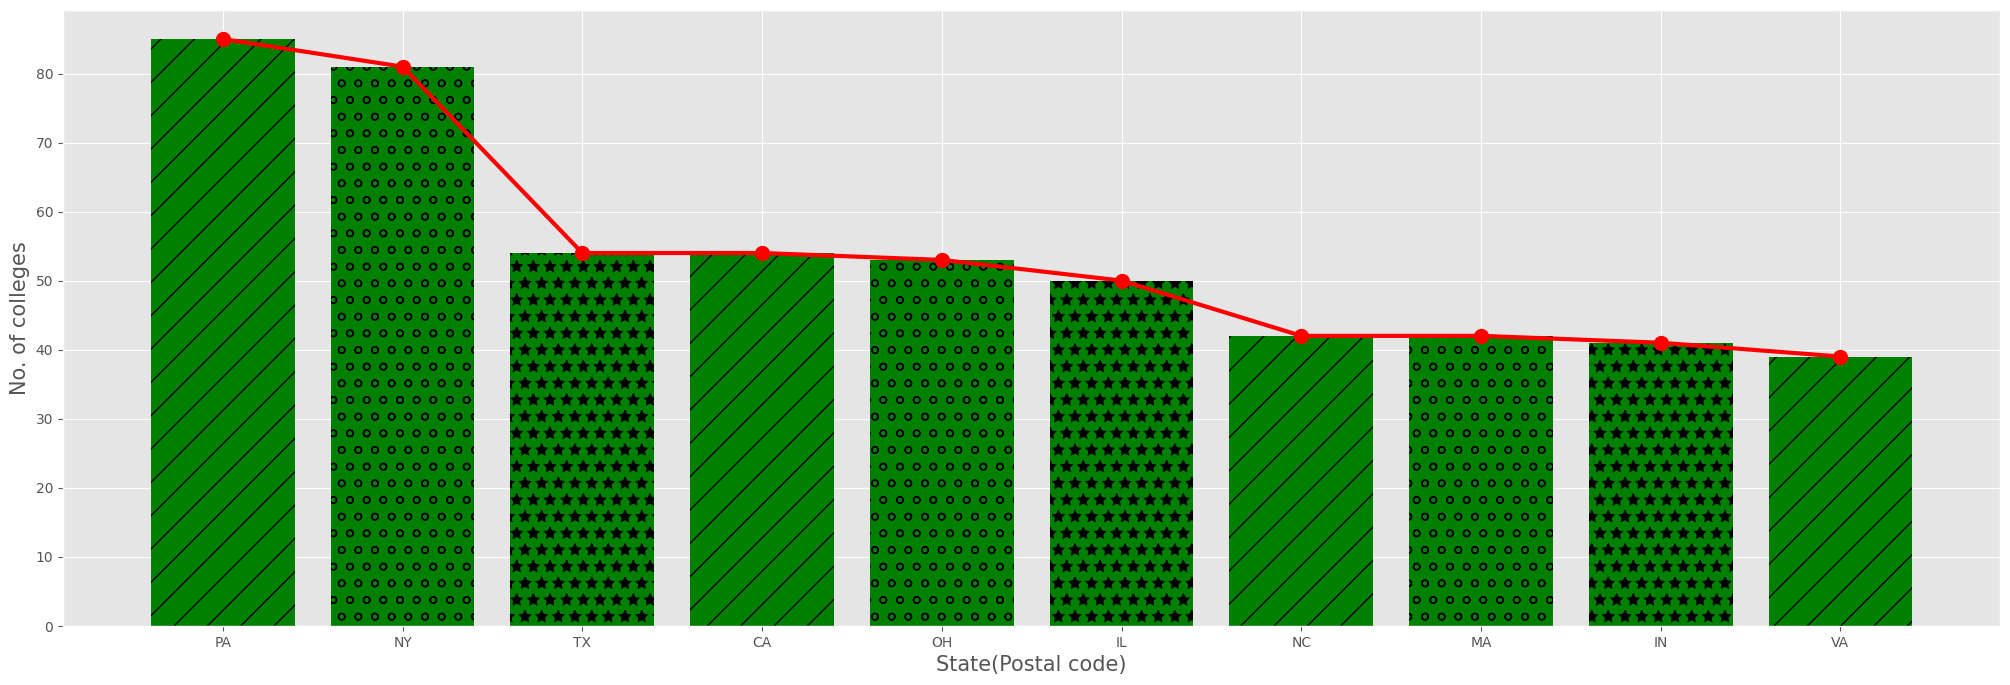

Most popular state is  PA
0.07321274763135228
So there are 7.321274763135229 % chances of choosing most popular state


In [5]:
# df_aaup.iloc[:,4].sum()
s=df_aaup.iloc[:,2].value_counts().head(10)
plt.plot(range(1,11),s,color='red',linewidth=3,marker='o',linestyle='-',markersize=10)

bars=plt.bar(np.arange(1,11),s,color='green')
plt.xticks(ticks=np.arange(1,11),labels=s.index)
lst=list('/o*'*4)
for i in range(10):
  bars[i].set_hatch(lst[i])
plt.xlabel('State(Postal code)',fontsize=15)
plt.ylabel('No. of colleges',fontsize=15)
plt.show()
print('Most popular state is ',s.index[0])

# For finding probability
Probability=s[0]/len(df_aaup.iloc[:,2])
print(Probability)
print('So there are {} % chances of choosing most popular state'.format(Probability*100))

### Q2) Which type of college pays more to the all ranked faculties?

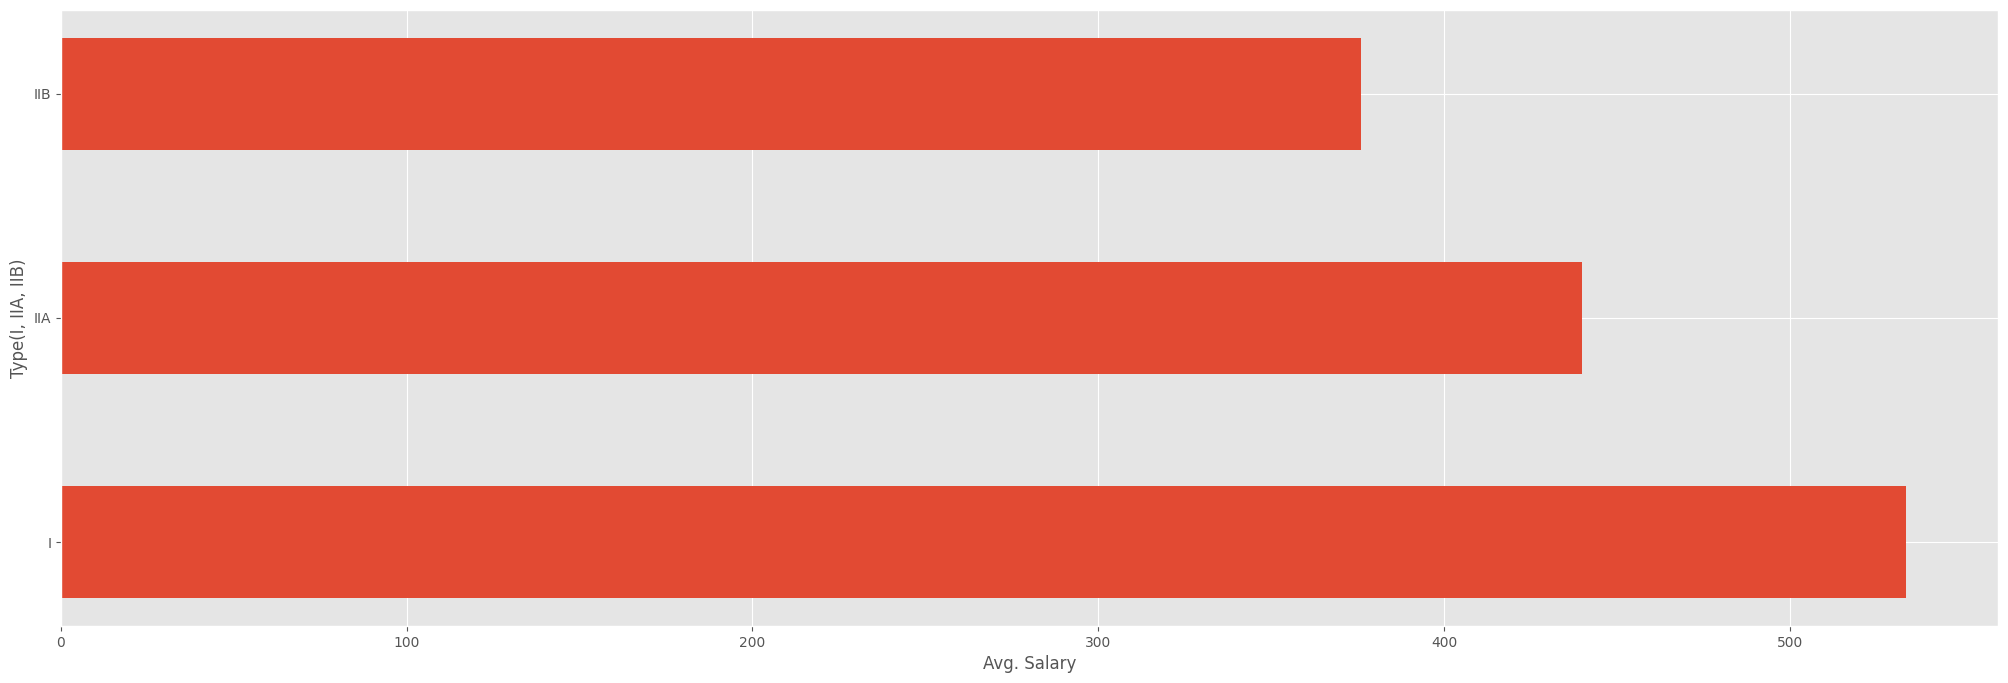

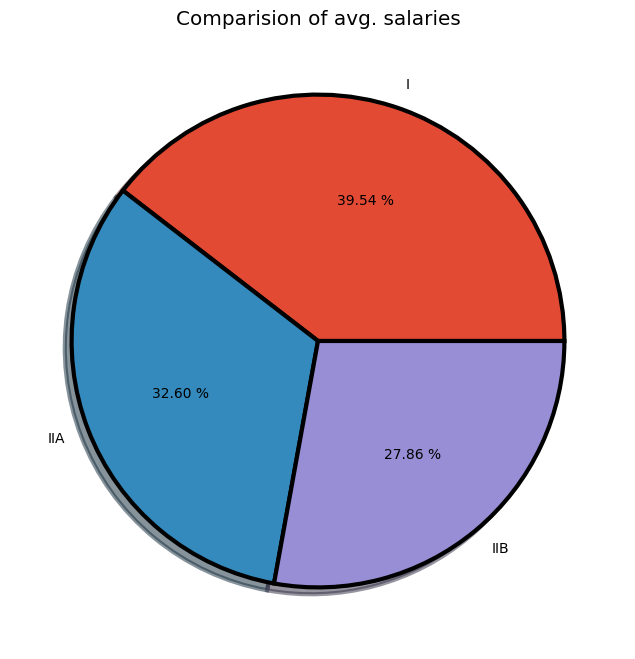

,"Type(I,IIA or IIB)",Average salary-all ranks
0,IIB,382
1,I,508
2,IIA,415
3,IIA,498
4,IIA,350
...,...,...
1156,IIB,349
1157,I,439
1158,IIB,383
1159,IIB,315


In [6]:

df=df_aaup.iloc[:,[3,7]]
IIB=df[df.iloc[:,0]=='IIB'].iloc[:,1].mean()
I=df[df.iloc[:,0]=='I'].iloc[:,1].mean()
IIA=df[df.iloc[:,0]=='IIA'].iloc[:,1].mean()
labels=['I','IIA','IIB']
plt.barh(labels,[I,IIA,IIB],height=0.5)
plt.xlabel('Avg. Salary')
plt.ylabel('Type(I, IIA, IIB)')
plt.figure()

plt.pie([I,IIA,IIB],labels=labels,autopct='%.2f %%',wedgeprops={'edgecolor':'black','linewidth':3},shadow=True)
plt.title('Comparision of avg. salaries')

plt.show()


df

## Q3) Does the size of the college affect the average salary of its faculty members?


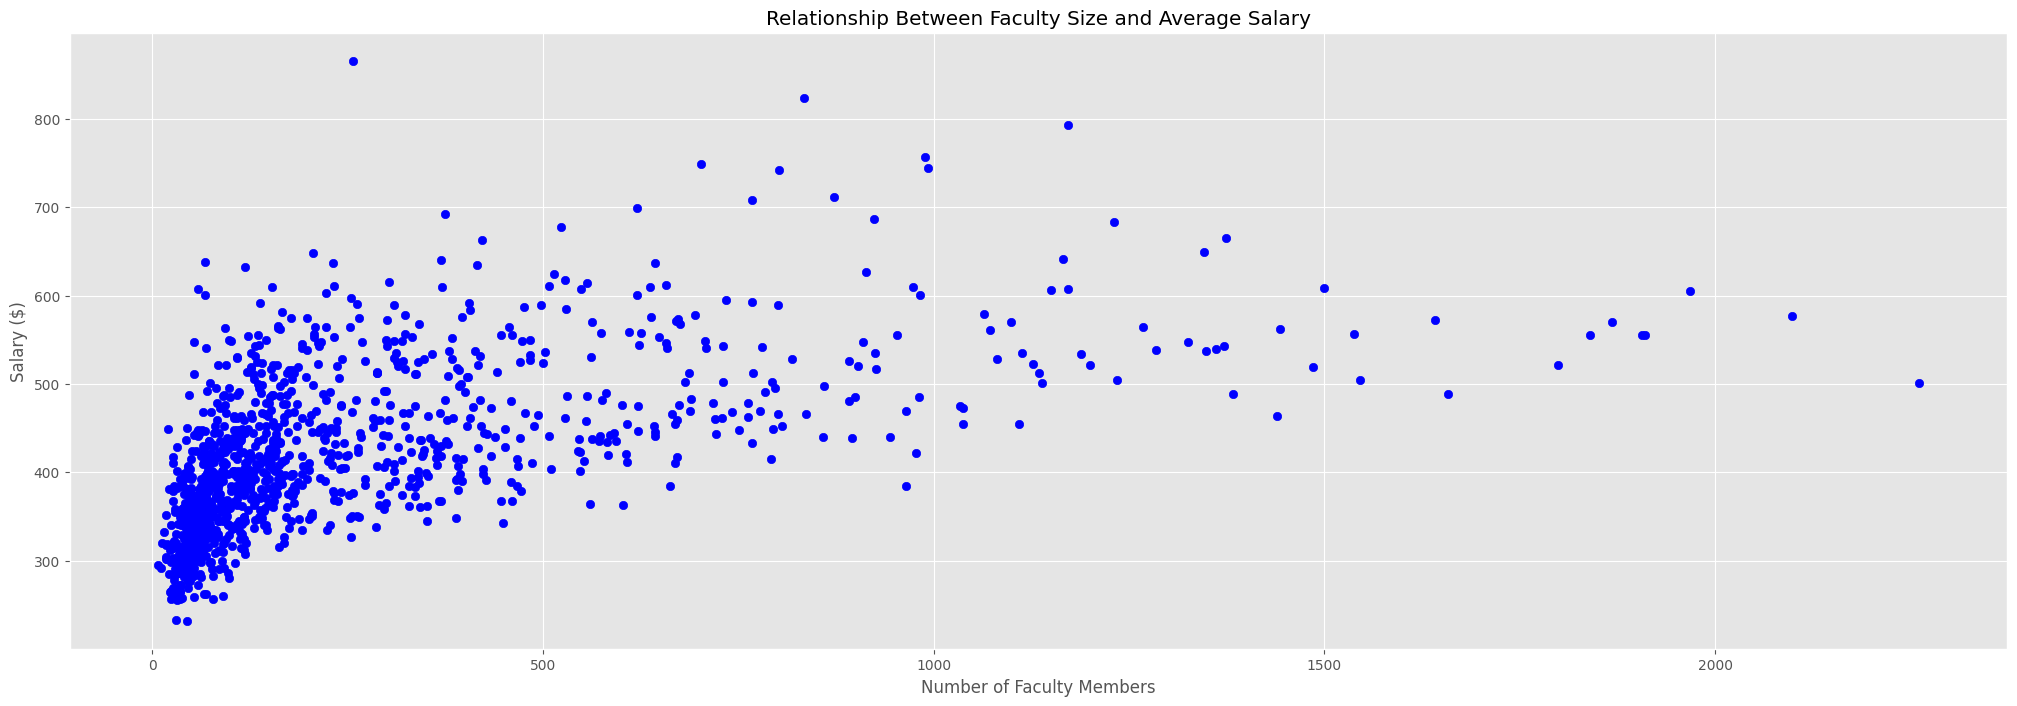

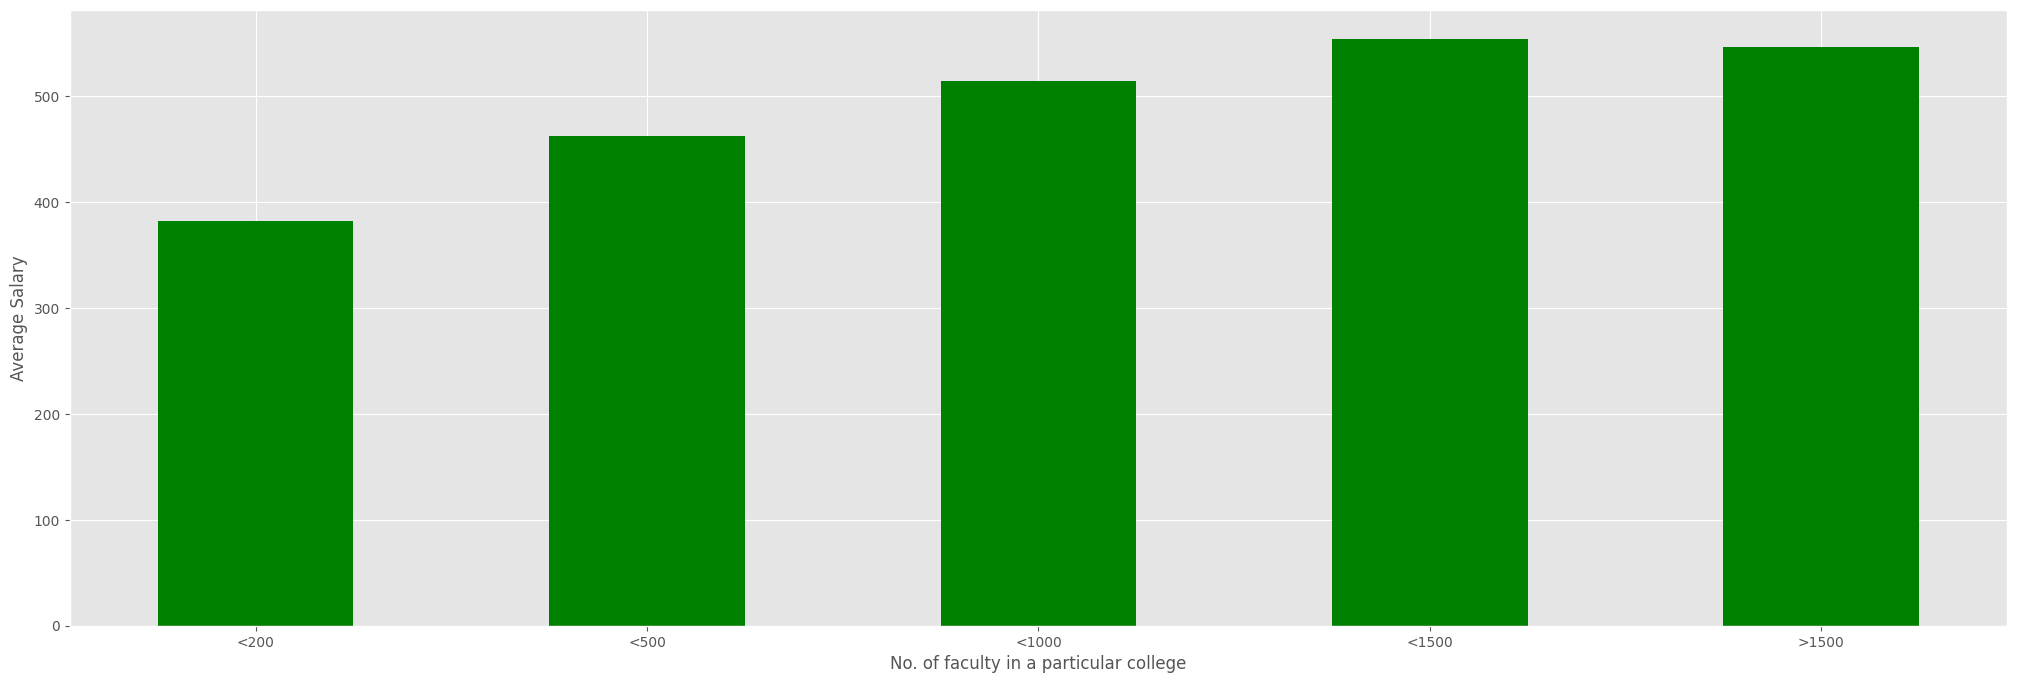

In [7]:
# Create a scatter plot to show the relationship between faculty size and average salary
plt.scatter(df_aaup.iloc[:,16], df_aaup.iloc[:,7] ,color='blue')
plt.title('Relationship Between Faculty Size and Average Salary')
plt.xlabel('Number of Faculty Members')
plt.ylabel('Salary ($)')
s=df_aaup.iloc[:,[7,16]]
s1=s[s.iloc[:,1]<200].iloc[:,0].mean()
s2=s[(s.iloc[:,1]<500) & (s.iloc[:,1]>=200)].iloc[:,0].mean()
s3=s[(s.iloc[:,1]<1000) & (s.iloc[:,1]>=500)].iloc[:,0].mean()
s4=s[(s.iloc[:,1]<1500) & (s.iloc[:,1]>=1000)].iloc[:,0].mean()
s5=s[s.iloc[:,1]>=1500].iloc[:,0].mean()
labels=['<200','<500','<1000','<1500','>1500']
plt.figure()
plt.bar(labels,[s1,s2,s3,s4,s5],color='green',width=0.5)
plt.xlabel('No. of faculty in a particular college')
plt.ylabel('Average Salary')
plt.show()

## Q4) Are there significant differences in the faculty salaries at colleges in different geographical regions of the US?

C:\Users\patel\AppData\Local\Temp\ipykernel_24772\2578568140.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region']=np.zeros(df.shape[0])
C:\Users\patel\AppData\Local\Temp\ipykernel_24772\2578568140.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Region'][i]=region


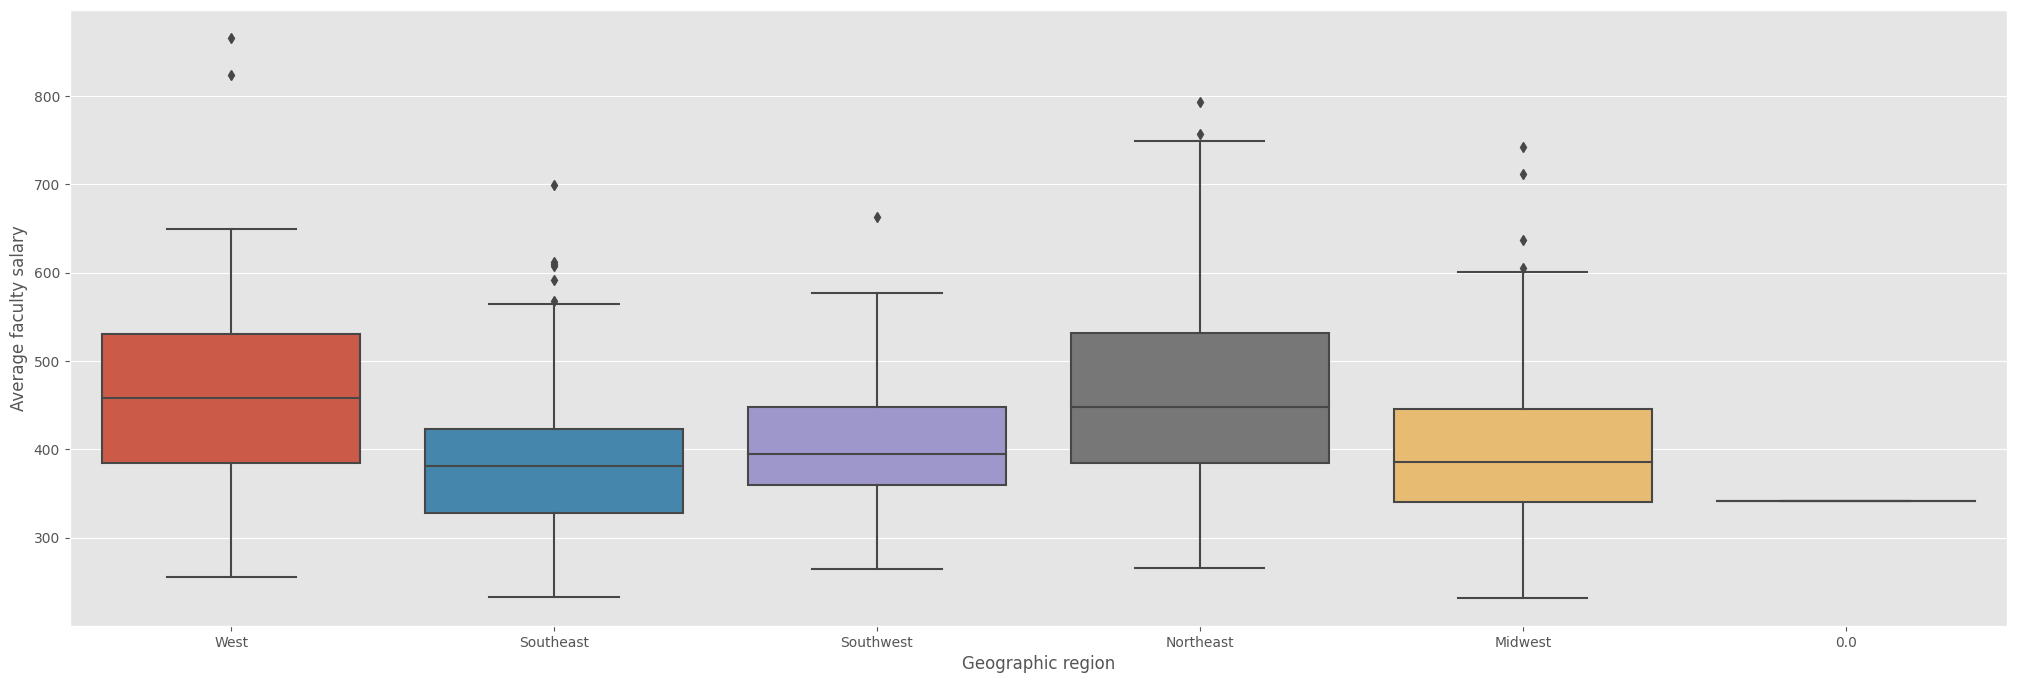

In [8]:
df=df_aaup.iloc[:,[2,7]]
# sns.boxplot(x='State(Postal code)',y='Average salary-all ranks',data=df)

# Add a column for geographic region
region_dict = {
    "Northeast": ["DE", "DC", "MD", "NJ", "NY", "PA","CT", "MA", "ME", "NH", "RI", "VT"],
    "Midwest": ["IA", "KS", "MN", "MO", "NE", "ND", "SD","IL", "IN", "MI", "OH", "WI"],
    "Southeast": ["AL", "AR", "FL", "GA", "KY", "LA", "MS", "NC", "SC", "TN", "VA", "WV"],
    "Southwest": ["AZ", "NM", "OK", "TX"],
    "West": ["CO", "ID", "MT", "UT", "WY","AK", "CA", "HI", "NV", "OR", "WA"],
}
df['Region']=np.zeros(df.shape[0])
for i in range (df.shape[0]):
    for region, states in region_dict.items():
        if df.iloc[:,0][i] in states:
            df['Region'][i]=region


sns.boxplot(x='Region',y='Average salary-all ranks',data=df)
plt.xlabel("Geographic region")
plt.ylabel("Average faculty salary")
plt.show()

## Q5) How does the number of faculty members vary with the type of college?


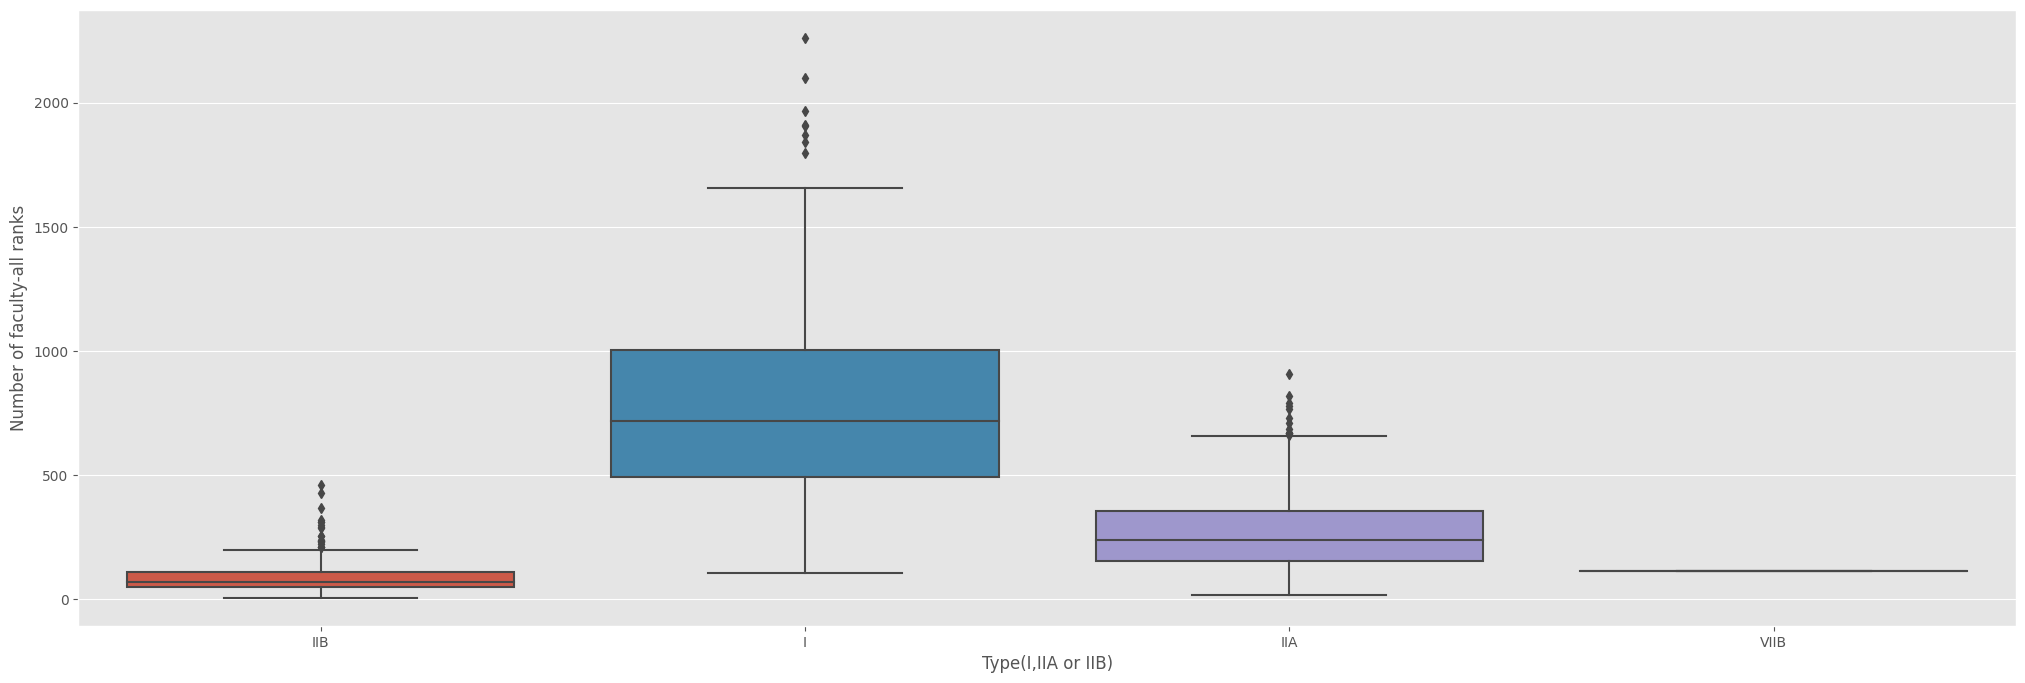

In [9]:
df=df_aaup.iloc[:,[3,16]]
sns.boxplot(x='Type(I,IIA or IIB)',y='Number of faculty-all ranks',data=df)
plt.show()

# US NEWS data set ---------------------------------------------------------------------------------------------

In [10]:
print('Total no. of privates colleges = ',df_usnews.iloc[:,3].value_counts()[2])
print('Total no. of public colleges = ',df_usnews.iloc[:,3].value_counts()[1])
print('Private colleges are almost double the public colleges')

df_usnews

Total no. of privates colleges =  832
Total no. of public colleges =  470
Private colleges are almost double the public colleges


,FICE (Federal ID number),College Name,State(Postal code),"Public/private indicator (public=1, private=2)",Average Math SAT score,Average Verbal SAT score,Average Combined SAT score,Average ACT score,First quartile - Math SAT,Third quartile - Math SAT,First quartile - Verbal SAT,Third quartile - Verbal SAT,First quartile - ACT,Third quartile - ACT,Number of applications received,Number of applicants accepted,Number of new students enrolled,Pct. new students from top 10% of H.S. class,Pct. new students from top 25% of H.S. class,Number of fulltime undergraduates,Number of parttime undergraduatesIn-state tuition,In-state tuition,Out-of-state tuition,Room and board costs,Room costs,Board costs,Additional fees,Estimated book costs,Estimated personal spending,Pct. of faculty with Ph.D.'s,Pct. of faculty with terminal degree,Student/faculty ratio,Pct.alumni who donate,Instructional expenditure per student,Graduation rate
0,1061,Alaska Pacific University,AK,2.0,490.0,482.0,972.0,20.0,440.0,530.0,430.0,550.0,18.0,22.0,193.0,146.0,55.0,16.0,44.0,249.0,869.0,7560.0,7560.0,4120.0,1620.0,2500.0,130.0,800.0,1500.0,76.0,72.0,11.9,2.0,10922.0,15.0
1,1063,University of Alaska at Fairbanks,AK,1.0,499.0,462.0,961.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,1852.0,1427.0,928.0,0.0,0.0,3885.0,4519.0,1742.0,5226.0,3590.0,1800.0,1790.0,155.0,650.0,2304.0,67.0,0.0,10.0,8.0,11935.0,0.0
2,1065,University of Alaska Southeast,AK,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,146.0,117.0,89.0,4.0,24.0,492.0,1849.0,1742.0,5226.0,4764.0,2514.0,2250.0,34.0,500.0,1162.0,39.0,51.0,9.5,0.0,9584.0,39.0
3,11462,University of Alaska at Anchorage,AK,1.0,459.0,422.0,881.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,2065.0,1598.0,1162.0,0.0,0.0,6209.0,10537.0,1742.0,5226.0,5120.0,2600.0,2520.0,114.0,580.0,1260.0,48.0,0.0,13.7,6.0,8046.0,0.0
4,1002,Alabama Agri. & Mech. Univ.,AL,1.0,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,14.0,17.0,2817.0,1920.0,984.0,0.0,0.0,3958.0,305.0,1700.0,3400.0,2550.0,1108.0,1442.0,155.0,500.0,850.0,53.0,53.0,14.3,0.0,7043.0,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297,3826,West Virginia State College,WV,1.0,0.0,0.0,0.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,1869.0,0.0,957.0,0.0,0.0,2817.0,1939.0,1988.0,4616.0,3200.0,1500.0,1700.0,50.0,750.0,750.0,38.0,38.0,19.2,4.0,3839.0,0.0
1298,3827,West Virginia University,WV,1.0,507.0,439.0,946.0,22.0,450.0,560.0,380.0,490.0,20.0,24.0,9630.0,7801.0,2881.0,23.0,49.0,14524.0,1053.0,2128.0,6370.0,4310.0,2284.0,2026.0,0.0,0.0,0.0,83.0,86.0,13.4,0.0,8318.0,57.0
1299,3830,West Virginia Wesleyan College,WV,2.0,489.0,439.0,928.0,23.0,420.0,560.0,370.0,500.0,20.0,27.0,1566.0,1400.0,483.0,28.0,55.0,1509.0,170.0,14200.0,14200.0,3775.0,1750.0,2025.0,0.0,450.0,1100.0,58.0,81.0,16.4,42.0,8080.0,67.0
1300,3831,Wheeling Jesuit College,WV,2.0,479.0,433.0,912.0,22.0,410.0,520.0,380.0,490.0,19.0,24.0,903.0,755.0,213.0,15.0,49.0,971.0,305.0,10500.0,10500.0,4545.0,2100.0,2445.0,0.0,600.0,600.0,66.0,71.0,14.1,27.0,7494.0,72.0


## Q1) Is there a correlation between the median SAT score for incoming freshmen and the graduation rate for a given college or university?

,Average Combined SAT score,Graduation rate
0,972.0,15.0
1,961.0,NaN
2,NaN,39.0
3,881.0,NaN
4,NaN,40.0
...,...,...
1297,NaN,NaN
1298,946.0,57.0
1299,928.0,67.0
1300,912.0,72.0


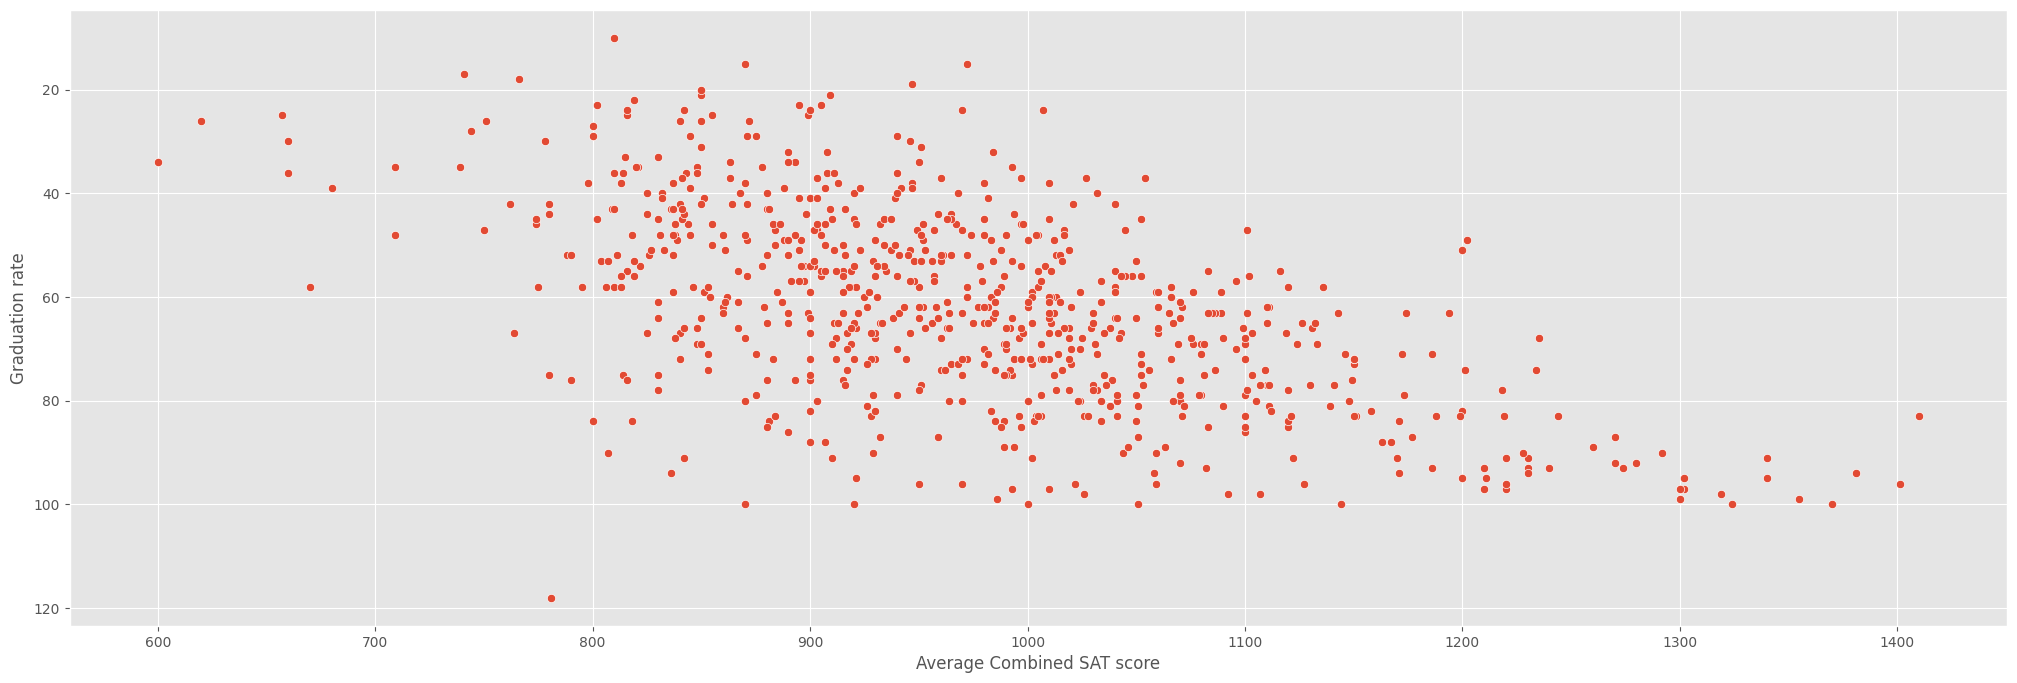

In [11]:
df=df_usnews.iloc[:,[6,34]].replace(0,'NaN').dropna()
sns.scatterplot(x='Average Combined SAT score',y='Graduation rate',data=df)
df

## Q2)Is it harder to get into a public college in the US or a private college?

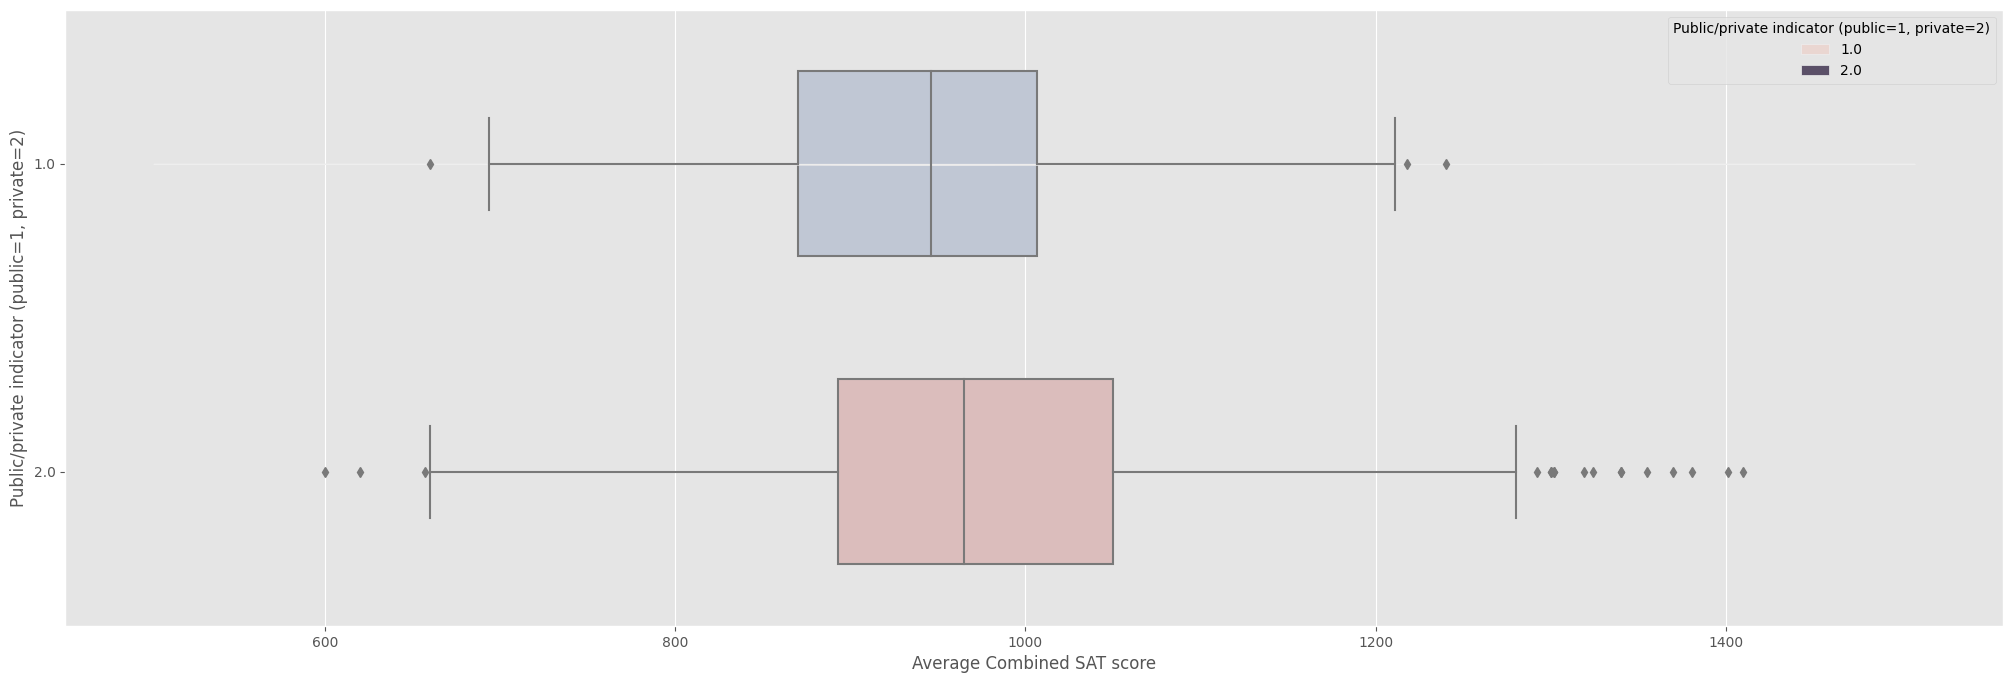

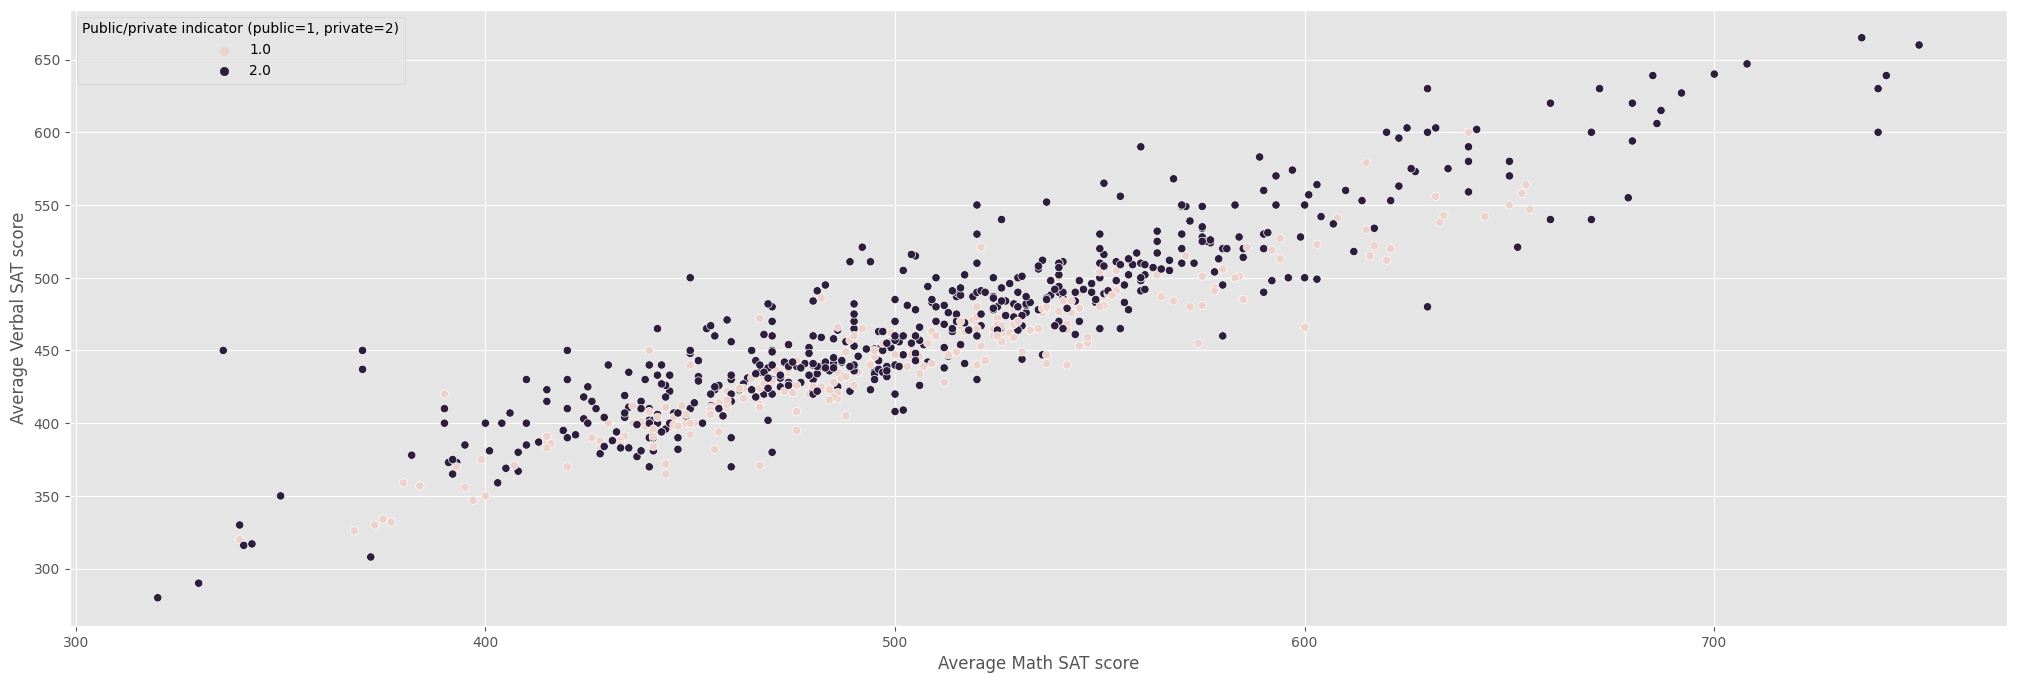

In [12]:

df=df_usnews.iloc[:,[3,6]]
drop_index=df[df.iloc[:,1]==0].index
df=df.drop(drop_index)
sns.boxplot(data=df,x='Average Combined SAT score',y='Public/private indicator (public=1, private=2)', width=.6, palette="vlag",orient='h')

sns.kdeplot(data=df, x='Average Combined SAT score', hue="Public/private indicator (public=1, private=2)",multiple='stack')

df=df_usnews.iloc[:,[3,4,5,6]]
drop_index=df[df.iloc[:,1]==0].index
df=df.drop(drop_index)
plt.figure()
sns.scatterplot(x='Average Math SAT score',y='Average Verbal SAT score',data=df,hue='Public/private indicator (public=1, private=2)')
plt.show()


## Q3) Is there a relationship between the percentage of faculty with PhD's and percentage of new students joining college from top 10% of H.S. class.

C:\Users\patel\AppData\Local\Temp\ipykernel_24772\45052513.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type of Colleges']=np.zeros(len(df))


,Pct. new students from top 10% of H.S. class,Pct. of faculty with Ph.D.'s,Type of Colleges
0,16.0,76.0,More than 70% of PhD faculty
1,0.0,67.0,Less than 70% of PhD faculty
2,4.0,39.0,Less than 70% of PhD faculty
3,0.0,48.0,Less than 70% of PhD faculty
4,0.0,53.0,Less than 70% of PhD faculty
...,...,...,...
1297,0.0,38.0,Less than 70% of PhD faculty
1298,23.0,83.0,More than 70% of PhD faculty
1299,28.0,58.0,Less than 70% of PhD faculty
1300,15.0,66.0,Less than 70% of PhD faculty


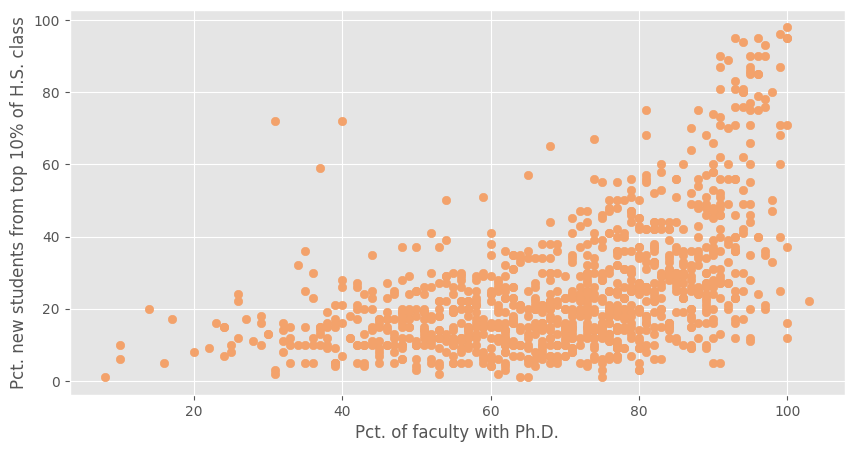

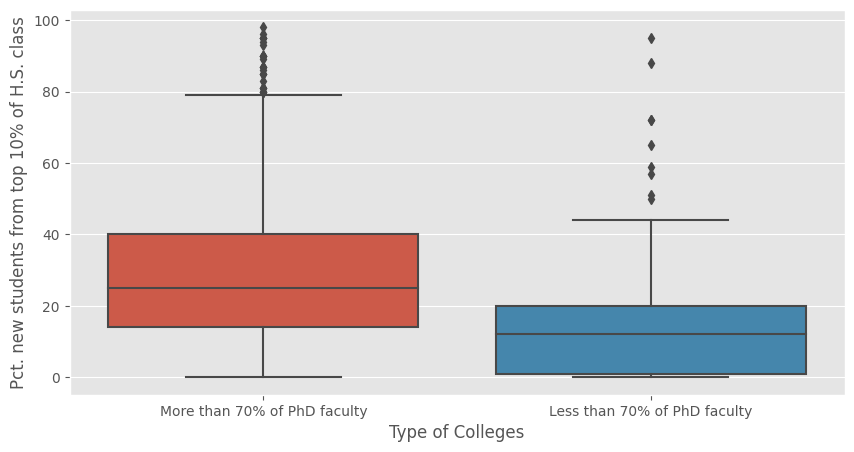

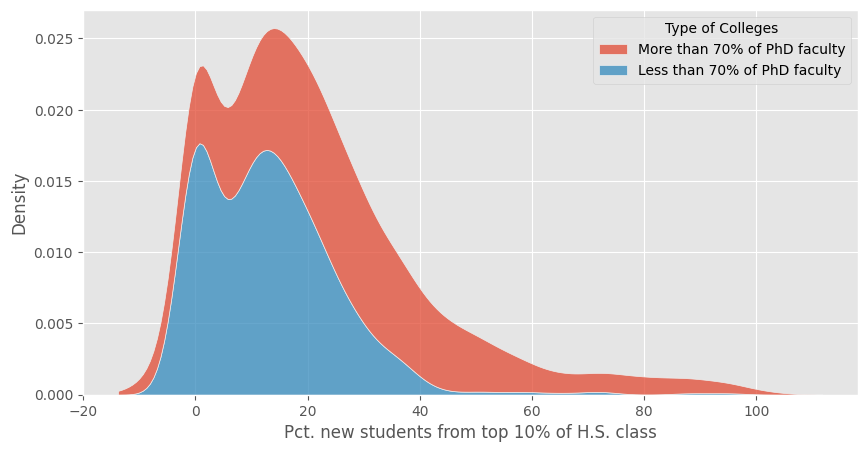

In [17]:
plt.rcParams['figure.figsize'] = [10, 5]   # set inline plots, width and height in inches

df=df_usnews[['Pct. new students from top 10% of H.S. class',"Pct. of faculty with Ph.D.'s"]].replace(0,'NaN')
plt.scatter(df.iloc[:,1],df.iloc[:,0],color='#f3a26b')
plt.xlabel('Pct. of faculty with Ph.D.')
plt.ylabel('Pct. new students from top 10% of H.S. class')

df=df_usnews[['Pct. new students from top 10% of H.S. class',"Pct. of faculty with Ph.D.'s"]]
df['Type of Colleges']=np.zeros(len(df))
for i in range(df.shape[0]):
    if (df.iloc[i,1]>70):
        df.iloc[i,2]='More than 70% of PhD faculty'
    elif df.iloc[i,1]<=70:
        df.iloc[i,2]='Less than 70% of PhD faculty'
    else:
        df.iloc[i,2]='NaN'
plt.figure()
sns.boxplot(data=df,x='Type of Colleges',y='Pct. new students from top 10% of H.S. class',orient='v')

plt.figure()
sns.kdeplot(data=df,hue='Type of Colleges',x='Pct. new students from top 10% of H.S. class',multiple='stack')
df

## Q4) Which type of college, public or private have higher acceptation rate of applicants? Is their any corelation between acceptation rate and percentage of new students from top 10% of H.S. class, joining the college?

C:\Users\patel\AppData\Local\Temp\ipykernel_24772\2732714280.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Acceptance Rate %']=(df1.iloc[:,1]/df1.iloc[:,0])*100
C:\Users\patel\AppData\Local\Temp\ipykernel_24772\2732714280.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.iloc[:,1]=df.iloc[:,1].replace(0,'NaN')


,"Public/private indicator (public=1, private=2)",Pct. new students from top 10% of H.S. class,Acceptance Rate %
0,2.0,16.0,75.647668
1,1.0,NaN,77.051836
2,1.0,4.0,80.136986
3,1.0,NaN,77.384988
4,1.0,NaN,68.157614
...,...,...,...
1297,1.0,NaN,NaN
1298,1.0,23.0,81.007269
1299,2.0,28.0,89.399745
1300,2.0,15.0,83.610188


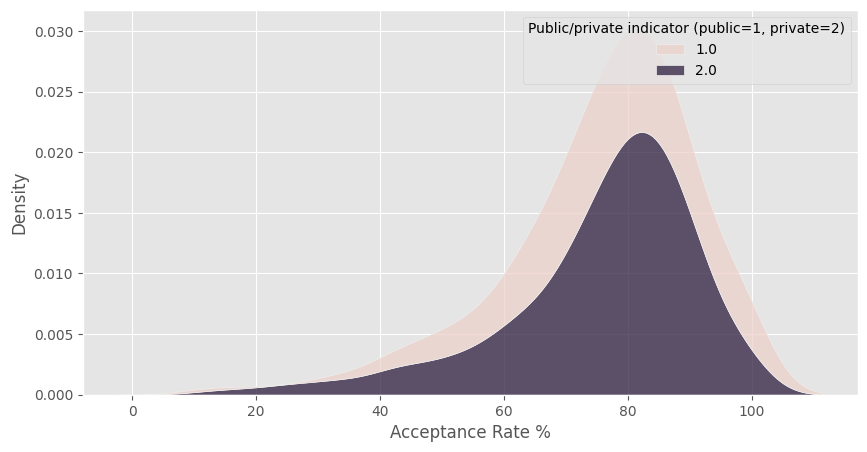

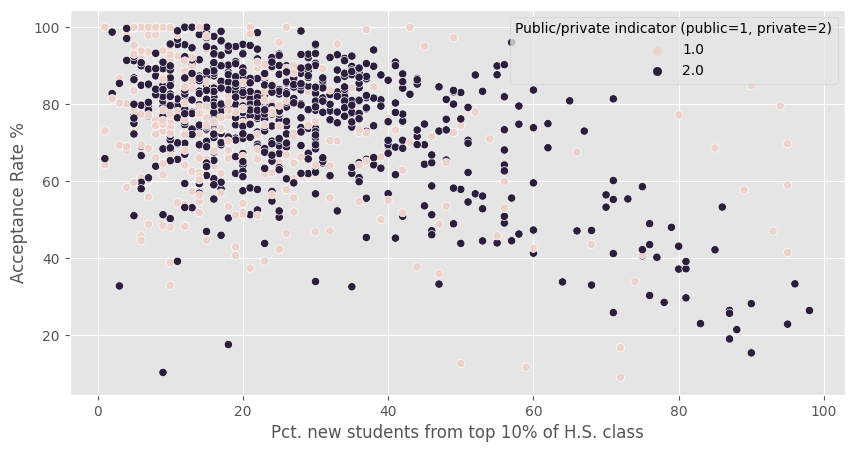

In [18]:
df=df_usnews[['Public/private indicator (public=1, private=2)','Pct. new students from top 10% of H.S. class']]
df1=df_usnews.iloc[:,[14,15]]
df1=df1.drop(df1[df1.iloc[:,0]==0].index)
df1=df1.drop(df1[df1.iloc[:,1]==0].index)
df['Acceptance Rate %']=(df1.iloc[:,1]/df1.iloc[:,0])*100
plt.figure()
sns.kdeplot(hue='Public/private indicator (public=1, private=2)',data=df,x='Acceptance Rate %',multiple='stack',color='blue')
plt.figure()
df.iloc[:,1]=df.iloc[:,1].replace(0,'NaN')
sns.scatterplot(data=df,x='Pct. new students from top 10% of H.S. class',y='Acceptance Rate %',hue='Public/private indicator (public=1, private=2)')
# df_usnews
df

## Q5) Does the number of applications a college receives depend upon the total cost a student must pay to the college? Which college, public or private, is expensive to students?


C:\Users\patel\AppData\Local\Temp\ipykernel_24772\3589921361.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Cost $']=s


,"Public/private indicator (public=1, private=2)",Number of applications received,Total Cost $
0,2.0,193.0,12610.0
1,1.0,1852.0,7879.0
2,1.0,146.0,8782.0
3,1.0,2065.0,9298.0
4,1.0,2817.0,5755.0
...,...,...,...
1297,1.0,1869.0,7302.0
1298,1.0,9630.0,8559.0
1299,2.0,1566.0,18425.0
1300,2.0,903.0,15645.0


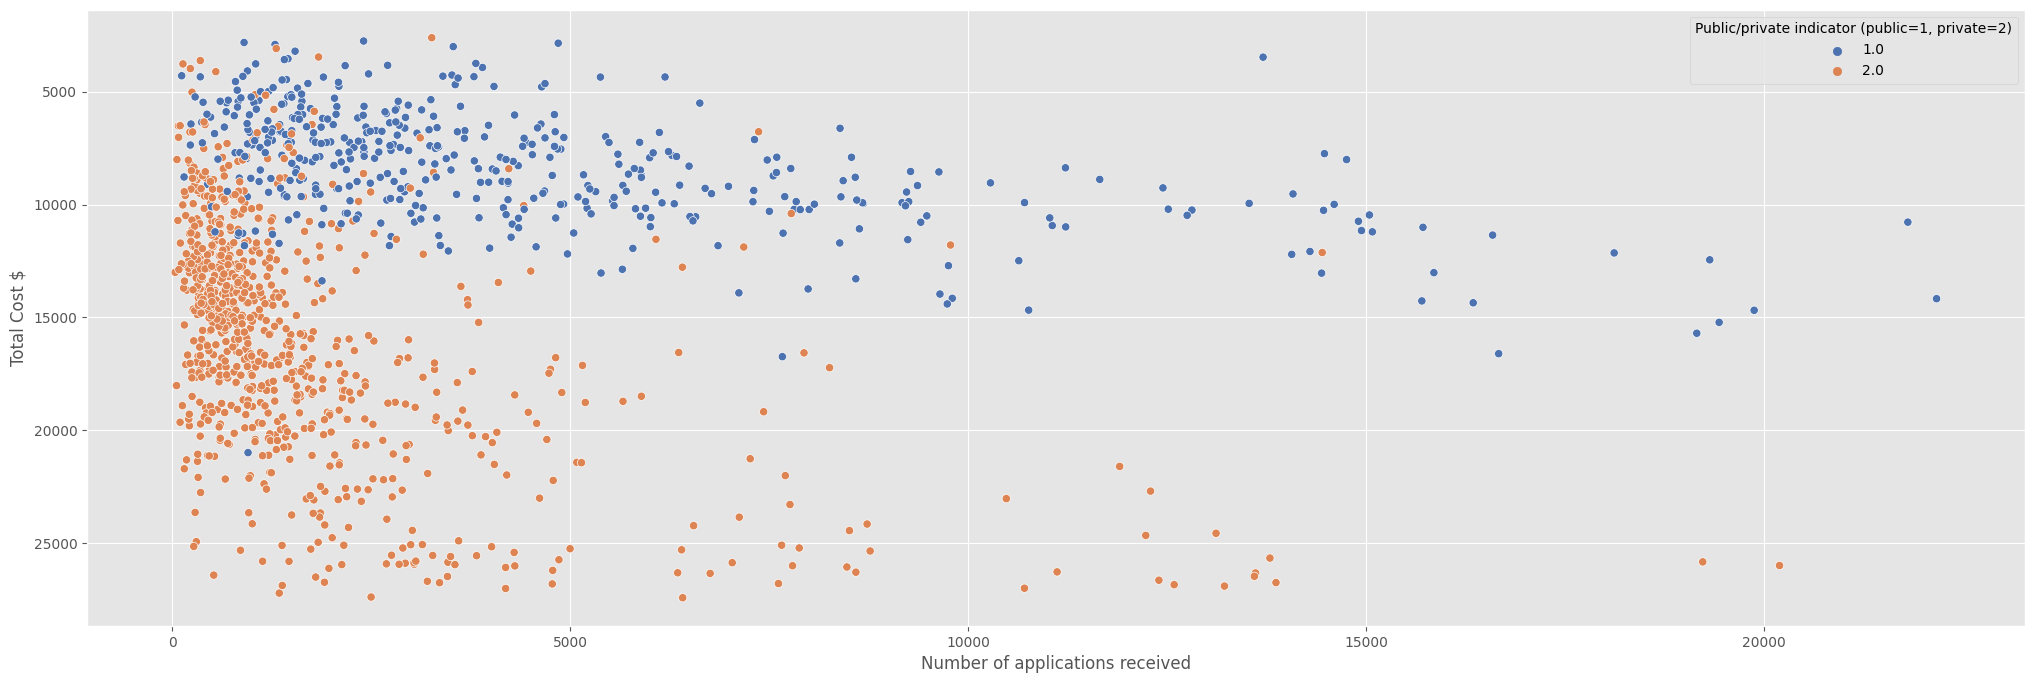

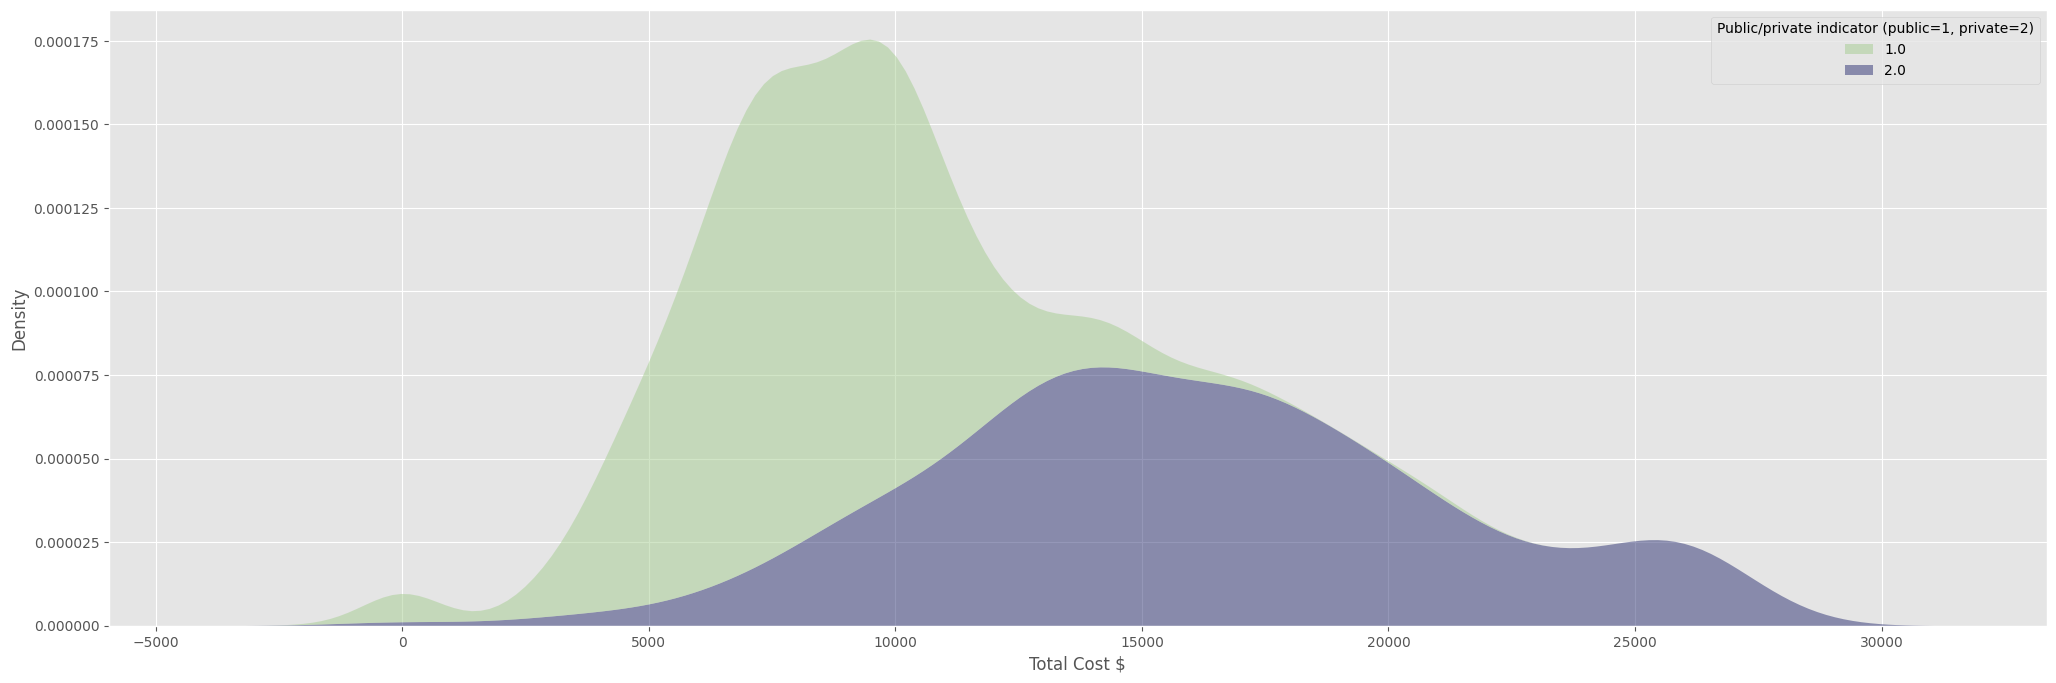

In [19]:
plt.rcParams['figure.figsize'] = [25, 8]   # set inline plots, width and height in inches
#Average of in-state and out-state tution fee 
s0=df_usnews.iloc[:,[21,22]].mean(axis=1)

s=df_usnews.iloc[:,[23,26,27]].sum(axis=1)+s0
df = df_usnews.iloc[:,[3,14]]
df['Total Cost $']=s
df1=df.copy()
df=df.replace(0,'Nan')
df=df.replace(48094,'Nan')
# print(max(df.iloc[:,1]))
sns.scatterplot(data=df,x='Number of applications received',y='Total Cost $',hue='Public/private indicator (public=1, private=2)',palette='deep')

plt.figure()

sns.kdeplot(data=df1,x='Total Cost $',multiple='stack',hue='Public/private indicator (public=1, private=2)',fill=True, common_norm=False, palette="crest",alpha=.5, linewidth=0)
df